In [71]:
import tsplib95
import mlrose
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Reading the tsp file 
cities_tsp = tsplib95.load("C:/Users/Abhinav Sharma/Desktop/dj38.tsp")

In [73]:
#Save as a dictionary
city_data_tsp = cities_tsp.as_name_dict()

In [68]:
# print(city_data_tsp)

In [74]:
# City coordinates (Latitute and Longitute) saved as a list of lists 
city_coordinates= [city_data_tsp['node_coords'][k] for k in city_data_tsp['node_coords']]

In [14]:
# city_coordinates

In [75]:
# Creating an Object that is the initialization of the fitness function using coordinates (Latitute/Longitude)
fit_city_coords = mlrose.TravellingSales(coords = city_coordinates)

In [76]:
# Optimization object defined 
optimization_object = mlrose.TSPOpt(length = len(city_coordinates), fitness_fn =fit_city_coords, maximize=False)

### Two types of cooling chosen for simmulated annealing - Exponential Decay and Arithmatic Decay
### and then the 'Simulated Annealing' algorithm run for both the cooling schedules chosen 

In [77]:
# Initializing parameters 
t0_list = [5, 50, 500] # Initial temperature
min_list = [0.5,5,50] # Minimum temperature 
d_list = [0.005,0.05,0.5] #Decay List


best_state_exp_list =[]
best_fitness_exp_list = []
fitness_curve_exp_list =[]

best_state_arithmatic_list =[]
best_fitness_arithmatic_list = []
fitness_curve_arithmatic_list = []

In [78]:
# Creating a cooling schedule (EXPONENTIAL DECAY) for simulated annealing with initial parameters 
for t in t0_list:
    for m in min_list:
        # Initial temp should be greater than Minimum temp
        
        if t < m:
            continue
        for d in d_list:
            
            cooling_schedule_exp = mlrose.ExpDecay(init_temp=t, exp_const=d, min_temp=m)
                
            best_state_exp, best_fitness_exp, fitness_curve_exp = mlrose.simulated_annealing(problem=optimization_object, 
                                                                                 schedule=cooling_schedule_exp,
                                                                                 max_attempts=500,
                                                                                 max_iters = 5000,
                                                                                 random_state = np.random.seed(7),
                                                                                 curve=True)
              
            best_state_exp_list.append(best_state_exp)
            best_fitness_exp_list.append(best_fitness_exp)
            fitness_curve_exp_list.append(fitness_curve_exp)          
                

D:\AllEnvironments\venv_optimization\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


In [79]:
# Creating a cooling schedule (ARITHMATIC DECAY) for simulated annealing with initial parameters 
for t in t0_list:
        for m in min_list:
            # Initial temp should be greater than Minimum temp
            if t < m:
                continue
            for d in d_list:
                cooling_schedule_arithmatic = mlrose.ArithDecay(init_temp=t, decay=d, min_temp=m)
                
                best_state_arithmatic, best_fitness_arithmatic, fitness_curve_arithmatic = mlrose.simulated_annealing(problem=optimization_object, 
                                                                                 schedule=cooling_schedule_arithmatic,
                                                                                 max_attempts=500,
                                                                                 max_iters = 5000,
                                                                                 random_state = np.random.seed(7),
                                                                                 curve=True)
                best_state_arithmatic_list.append(best_state_arithmatic)
                best_fitness_arithmatic_list.append(best_fitness_arithmatic)
                fitness_curve_arithmatic_list.append(fitness_curve_arithmatic)

In [86]:
len(best_fitness_exp_list)

24

In [84]:
print(best_fitness_exp_list)
print(np.min(best_fitness_exp_list))

[10696.848677121603, 8494.710809497905, 8494.710809497905, 10697.994445259623, 10697.994445259623, 10697.994445259623, 10733.394179176848, 9771.006489763005, 8494.710809497905, 11716.522190864443, 10328.544972069678, 10697.994445259623, 9193.475911630612, 9193.475911630612, 9193.475911630612, 10619.392500973785, 9097.768492708705, 10584.555254967485, 9282.377219008737, 9246.685088394384, 10478.965274637803, 9134.221230726404, 8485.861466759017, 8902.022097752013]
8485.861466759017


[20 13  9  0  1 19 21 23 14 12  6  5  3  2  4  7  8 15 18 17 16 11 10 26
 30 35 33 27 25 22 24 32 37 36 34 31 29 28]


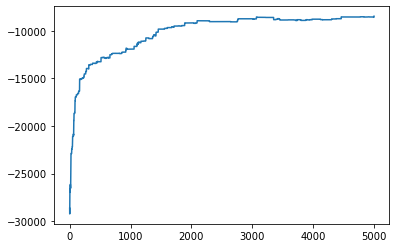

In [85]:
print(best_state_exp_list[22])
plt.plot(fitness_curve_exp_list[22])

In [82]:
print(np.min(best_fitness_arithmatic_list))

8494.710809497905


### Genetic Algorithm 

In [102]:
populuation_list = [100, 1000, 10000]
mutation_prob_list = [0.01,0.1, 0.5]
best_fitness_genetic_list = []

In [66]:
for i in populuation_list:
        for j in mutation_prob_list:
            best_state_genetic, best_fitness_genetic, fitness_curve_genetic = mlrose.genetic_alg(problem=optimization_object,
                                                                         pop_size=i,
                                                                         mutation_prob=j,
                                                                         max_attempts=500,
                                                                         max_iters=5000,
                                                                         random_state = np.random.seed(7),
                                                                         curve=True)
            best_fitness_genetic_list.append(best_fitness_genetic)
            